# Description

The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age and so on.

# Import Library

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
df=pd.read_csv('./diabetes.csv')

# Describe Data

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Observations

1. There are total 0f 768 records and 9 features in the dataset.
2. Each feature can be either of integer or float datatype.
3. Some features like Glucose, Blood Pressure, Insulin, BMI have zero values which represent missing data.
4. There are zero NaN values in the dataset.
5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

# Data Visualization

<Axes: xlabel='Outcome', ylabel='count'>

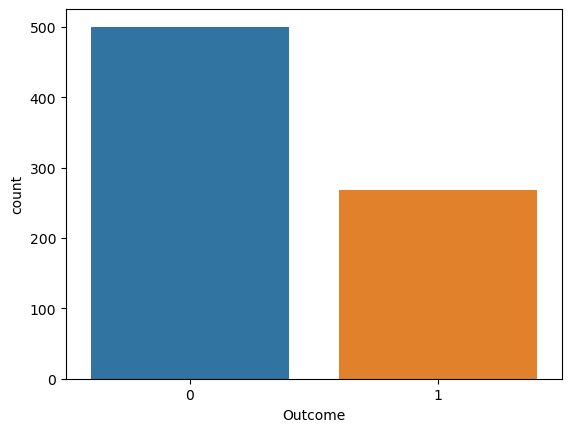

In [8]:
sns.countplot(x='Outcome',data=df)

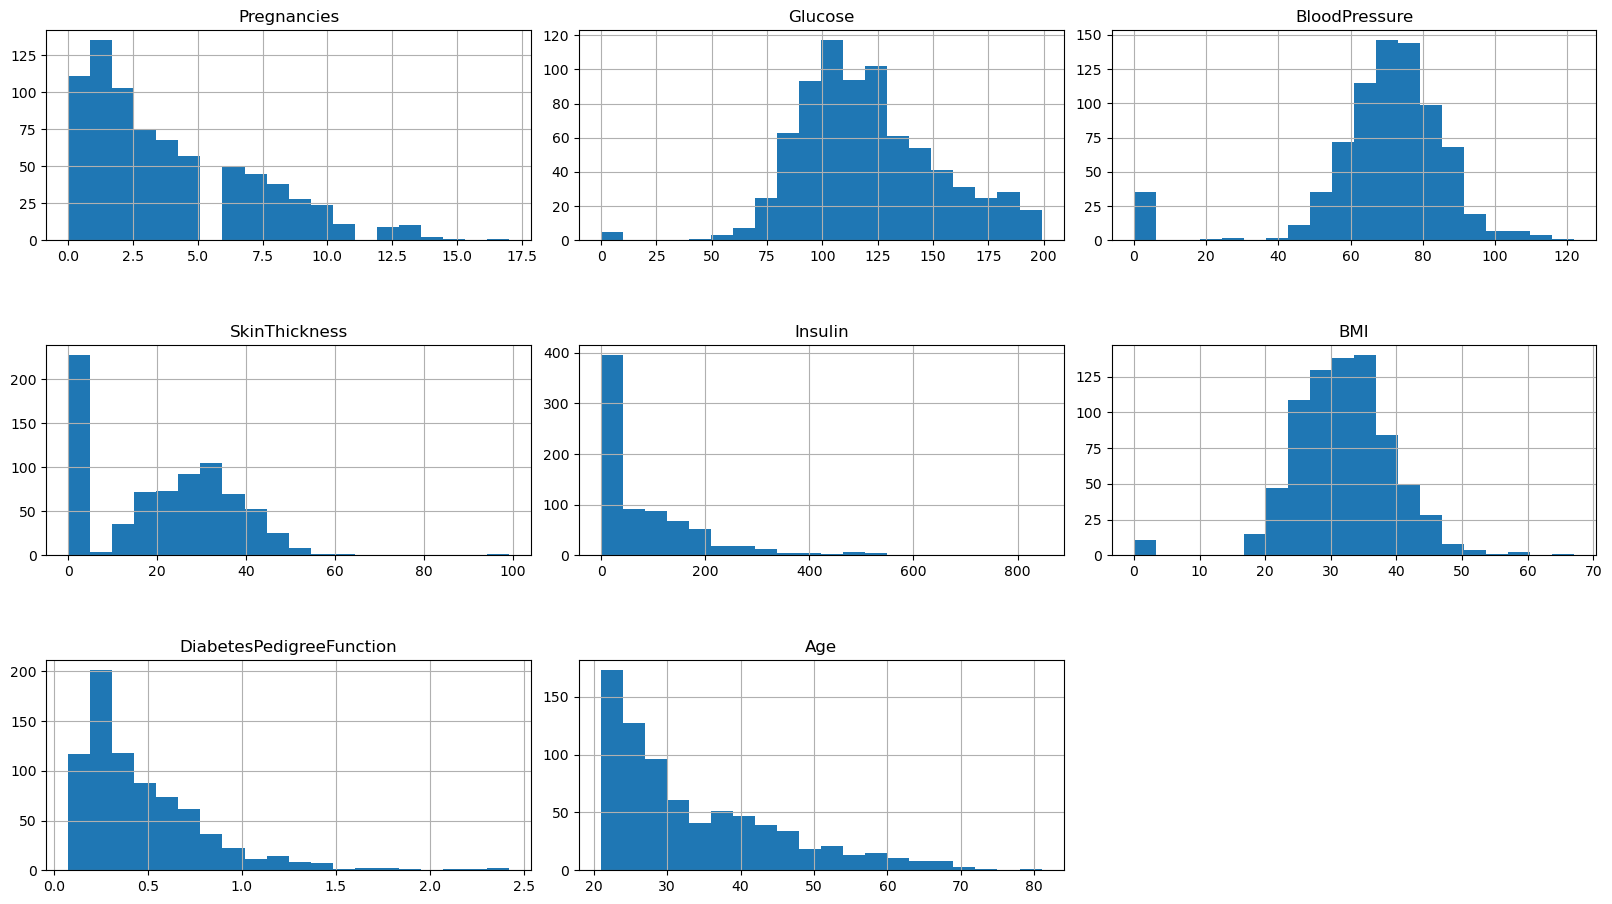

In [9]:
import itertools
col=df.columns[:8]
plt.subplots(figsize=(20,15))
length=len(col)
for i, j in itertools.zip_longest(col,range(length)):
    plt.subplot((length//2),3,j+1)
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    df[i].hist(bins=20)
    plt.title(i)
plt.show()

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

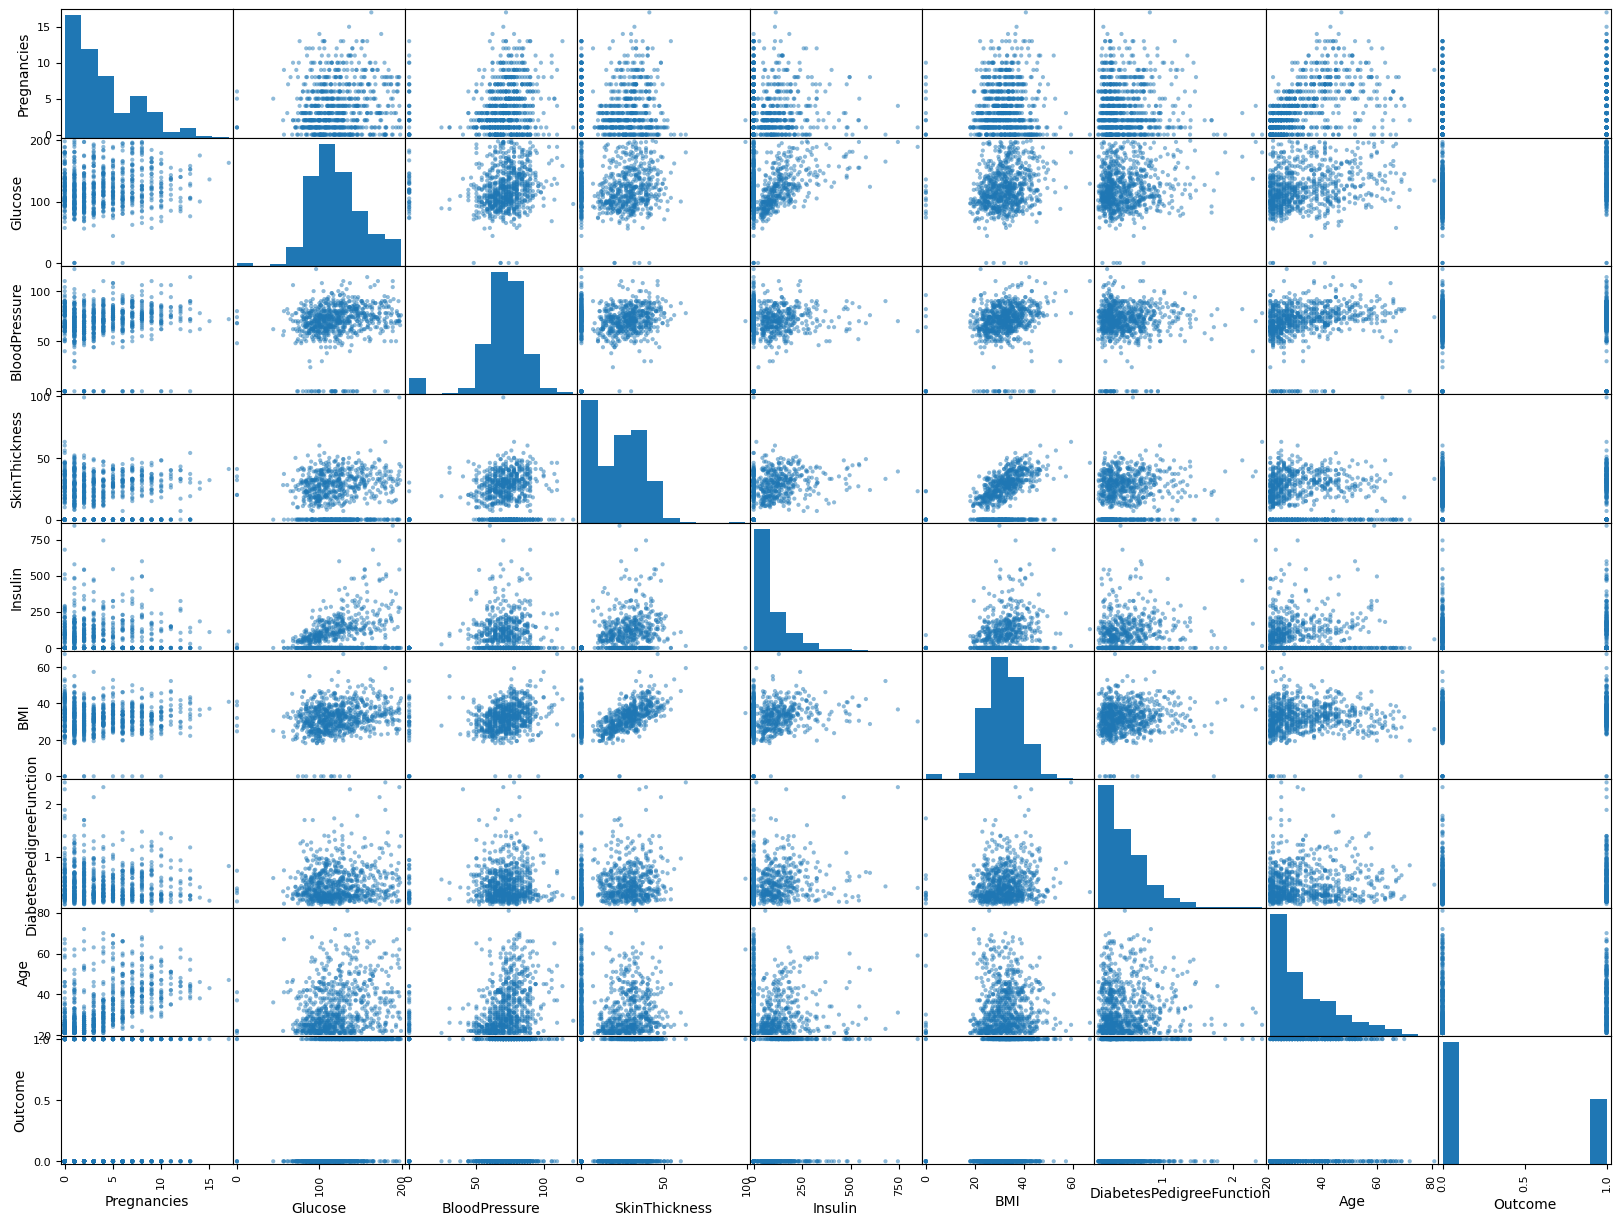

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,15))

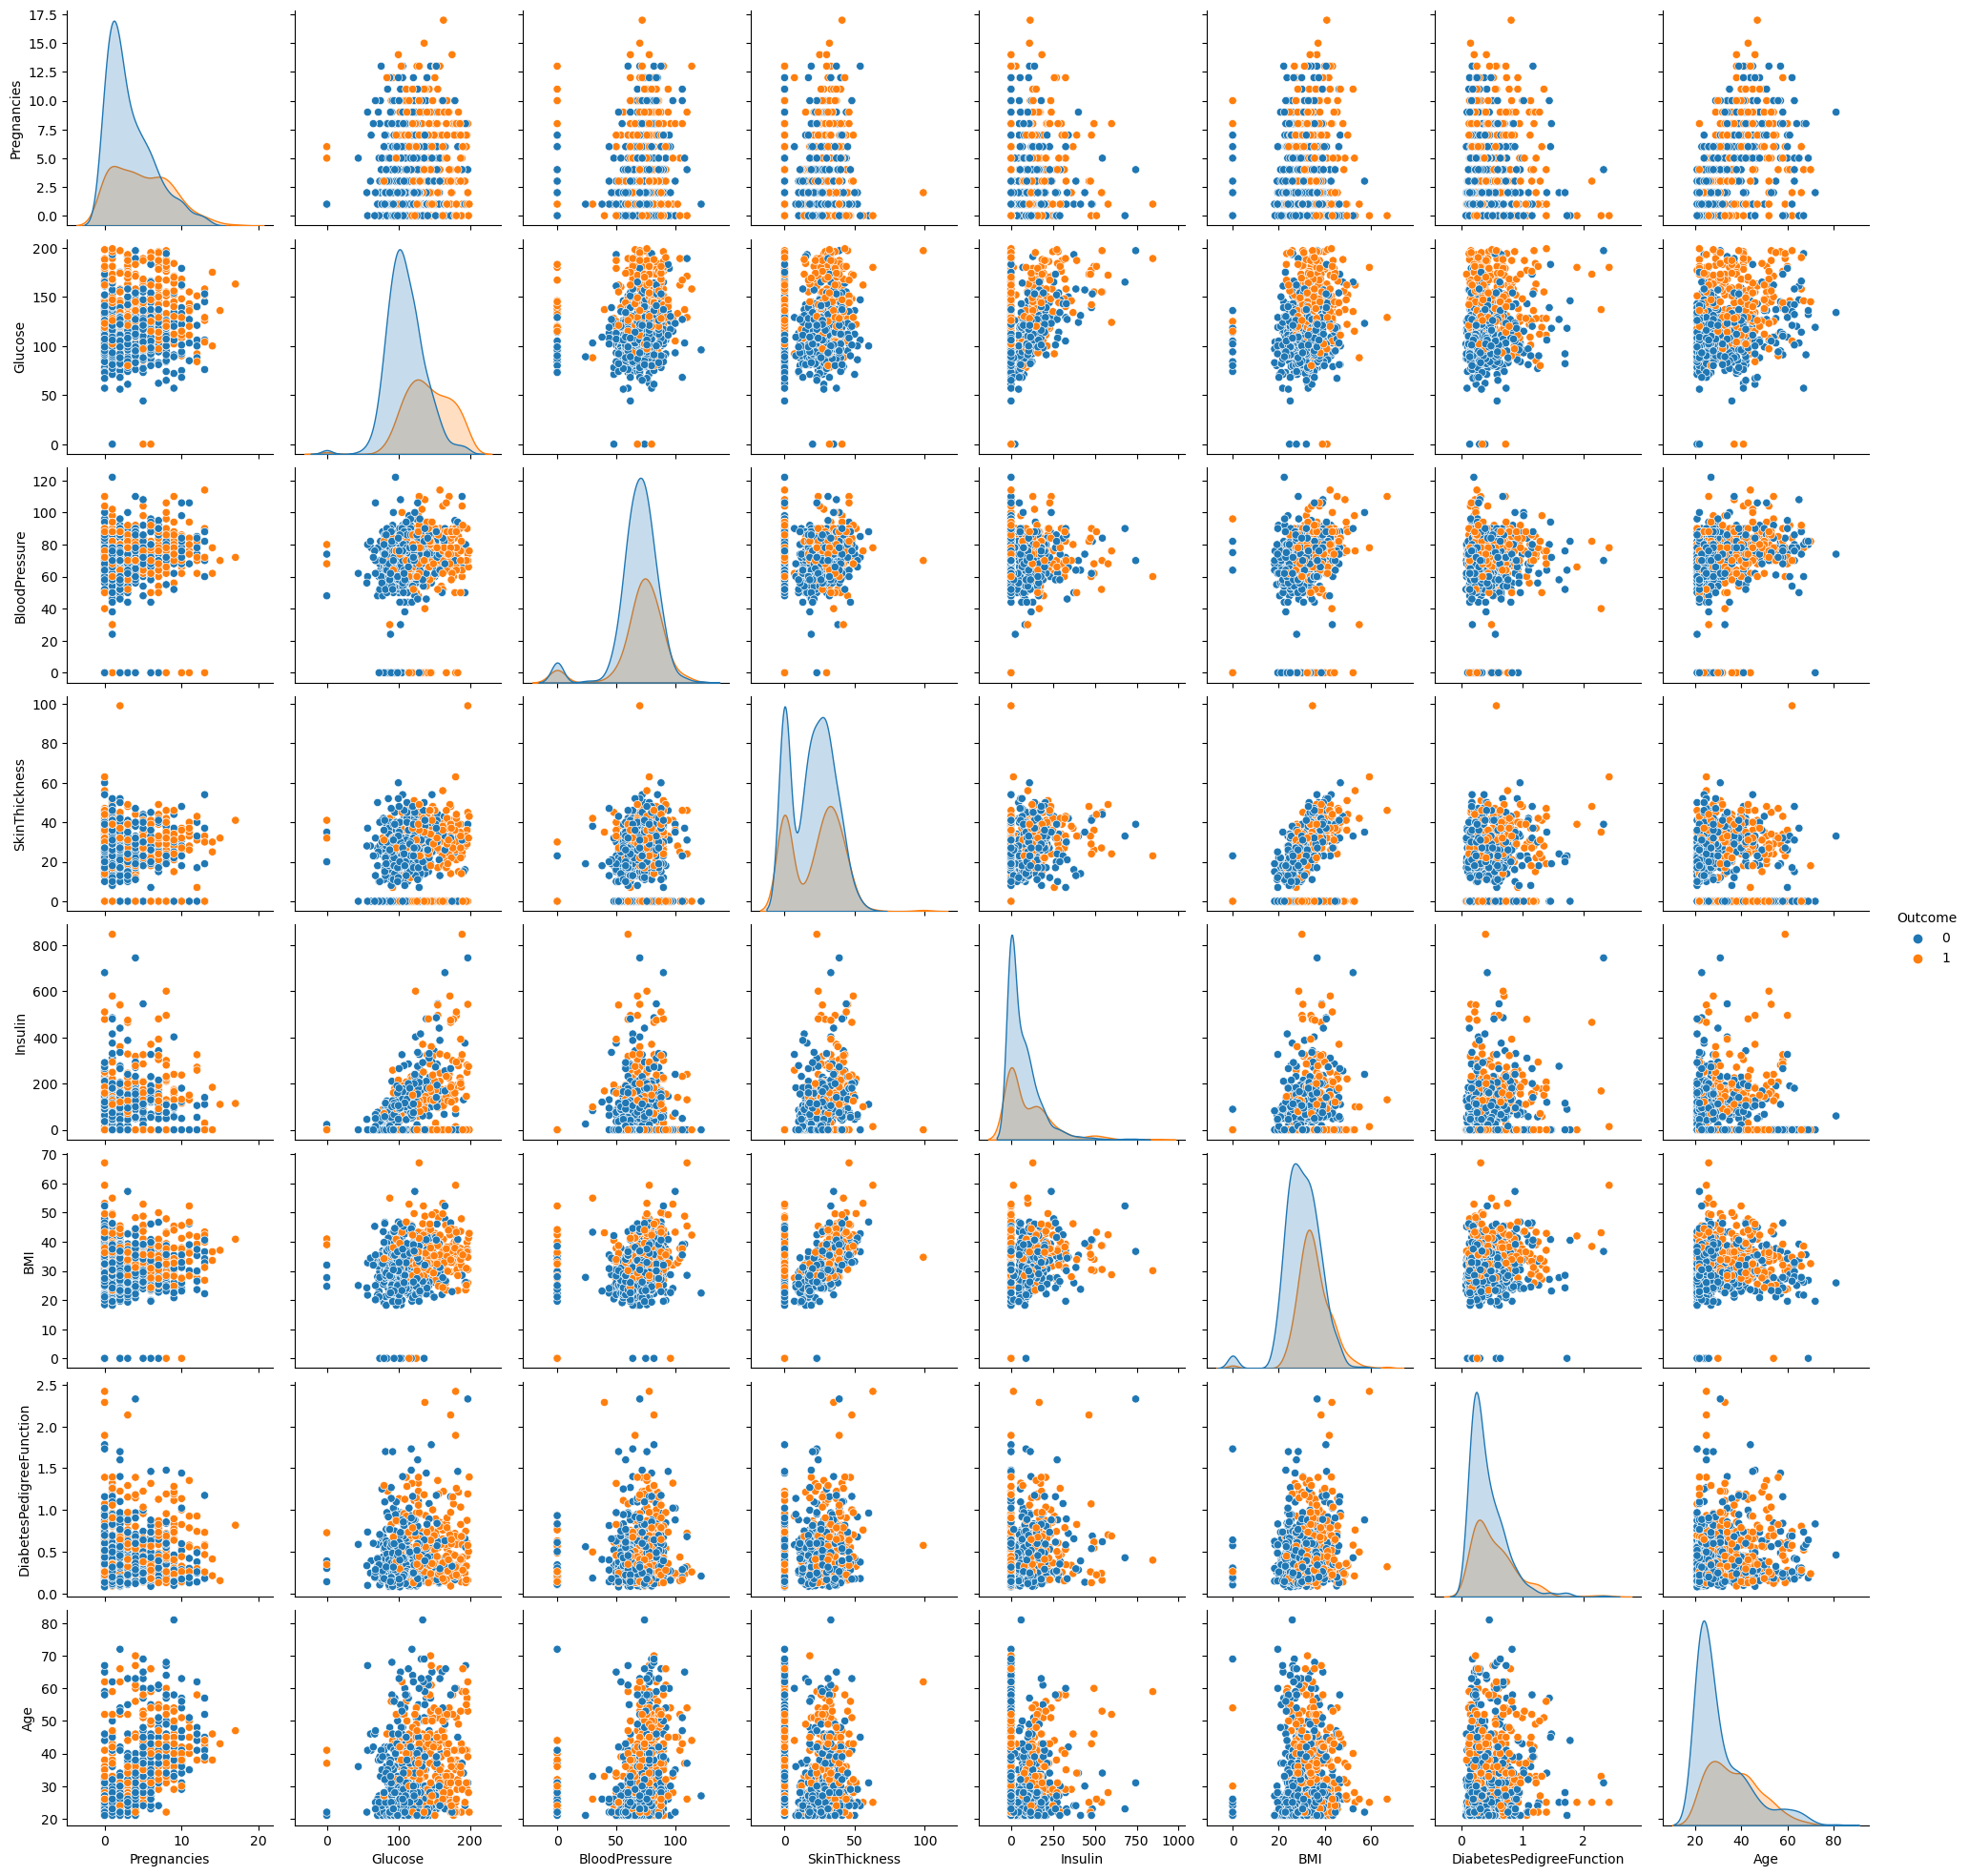

In [11]:
sns.pairplot(data=df,hue='Outcome')
plt.show()

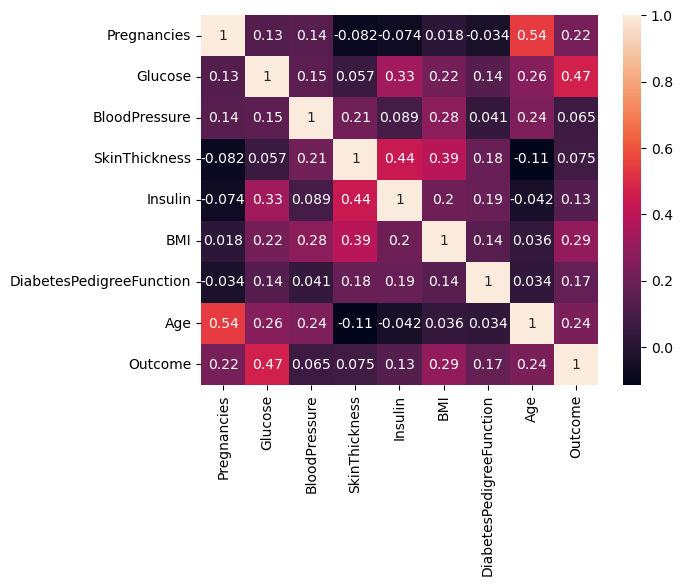

In [12]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Obeservations:

1. The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
2. From the correlation in heatmap, we can see that there is a high correlation between Outcome and Glucose,BMI,Age,Insulin. We can select these features to accept input from the user and predict the outcome.

# Data Preprocessing

In [13]:
df_new=df

In [14]:
df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NAN)

In [15]:
df_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
df_new['Glucose'].fillna(df_new['Glucose'].mean(),inplace=True)
df_new['BloodPressure'].fillna(df_new['BloodPressure'].mean(),inplace=True)
df_new['SkinThickness'].fillna(df_new['SkinThickness'].mean(),inplace=True)
df_new['Insulin'].fillna(df_new['Insulin'].mean(),inplace=True)
df_new['BMI'].fillna(df_new['BMI'].mean(),inplace=True)

In [17]:
df_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
df_scaled=sc.fit_transform(df_new)

In [19]:
df_scaled=pd.DataFrame(df_scaled)

# Selecting Dependent Variables and Independent Variables

In [20]:
x=df_scaled.iloc[:,[1,4,5,7]].values
y=df_scaled.iloc[:,8].values

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2324)

In [22]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (537, 4)
x_test shape: (231, 4)
y_train shape: (537,)
y_test shape: (231,)


# Data Modeling

In [23]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=42)
logreg.fit(x_train,y_train)

LogisticRegression(random_state=42)

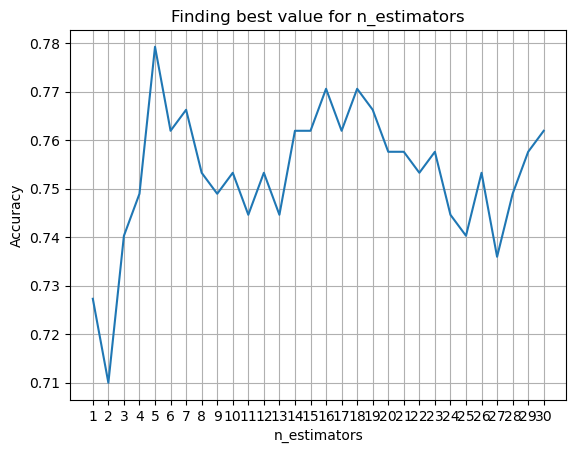

Highest value:  0.7792207792207793


In [24]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

x_axis=list(range(1,31))
acc=pd.Series()
z=range(1,31)

for i in list(range(1,31)):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    prediction=knn_model.predict(x_test)
    acc=acc.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(x_axis,acc)
plt.xticks(z)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [25]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',random_state=42)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [26]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [27]:
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier(criterion='entropy',random_state=42)
dectree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier(n_estimators=11,criterion='entropy',random_state=42)
ranfor.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

# Model Prediction

In [29]:
y_pred_logreg=logreg.predict(x_test)
y_pred_knn=knn_model.predict(x_test)
y_pred_svc=svc.predict(x_test)
y_pred_nb=nb.predict(x_test)
y_pred_dectree=dectree.predict(x_test)
y_pred_ranfor=ranfor.predict(x_test)

# Model Evaluation

In [30]:
from sklearn.metrics import accuracy_score
accuracy_logreg=accuracy_score(y_test,y_pred_logreg)
accuracy_knn=accuracy_score(y_test,y_pred_knn)
accuracy_svc=accuracy_score(y_test,y_pred_svc)
accuracy_nb=accuracy_score(y_test,y_pred_nb)
accuracy_dectree=accuracy_score(y_test,y_pred_dectree)
accuracy_ranfor=accuracy_score(y_test,y_pred_ranfor)

In [31]:
print("Logistic Regression: "+str(accuracy_logreg*100))
print("K Nearest neighbors: "+str(accuracy_knn*100))
print("Support Vector Classifier: "+str(accuracy_svc*100))
print("Naive Bayes: "+str(accuracy_nb*100))
print("Decision Tree Classifier: "+str(accuracy_dectree*100))
print("Random Forest: "+str(accuracy_ranfor*100))

Logistic Regression: 76.19047619047619
K Nearest neighbors: 76.19047619047619
Support Vector Classifier: 77.05627705627705
Naive Bayes: 76.62337662337663
Decision Tree Classifier: 65.80086580086581
Random Forest: 74.89177489177489


In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_svc)
cm

array([[134,  16],
       [ 37,  44]], dtype=int64)

<Axes: >

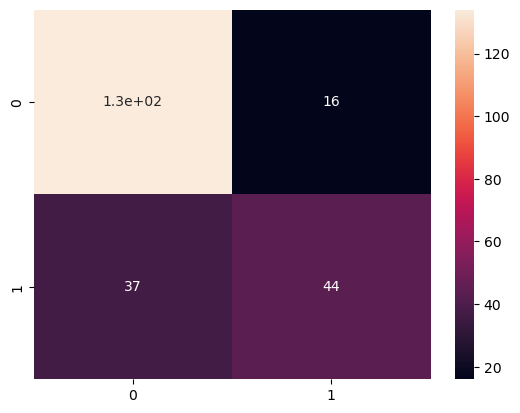

In [33]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       150
         1.0       0.73      0.54      0.62        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231

